# <center> Notebook - Data Science Competition - Meilleur Data Scientist de France <center/>

*This notebook is about my participation to the data science competition: ['Le Meilleur Data Scientist de France'](https://www.datascience.net/fr/challenge/25/details). This goal of this competition is to construct a predictive model to estimates the prices of medication boxes.*

**On this competition, I obtain a MAP score of 29,06%. On the leaderboard, I was on the top 15% (27/222).**

![optional caption text](getChallengeImage.jpg)

## <center> Summary <center/>

[0. Exploratory Analysis](#Exploratory_Analysis)

> [0.1 Import DataSet](#Import)

> [0.2. Quick Look of the dataset](#dataset)

> [0.3. List the different type of features](#features)

> [0.4. Descriptive Analysis](#DesAna)

[1. Data Cleaning](#Data_Cleaning)

> [1.1. Duplicated Rows](#Duplicated)

> [1.2. Duplicated Rows Bis (without interest variable)](#Duplicated_bis)

> [1.3. NaN Values](#NaN)

[2. Single Model](#Single_Model)

> [2.1. Cross-Validation](#Cross_Validation)

> [2.2. Single Model](#Single_Model2)

> [2.3. Performance Metrics](#Perf)

> [2.4. Single Model Function](#Single_function)


[3. Features Engineering](#Single_Model)

> [3.1. Transformation of 'prix'](#Prix_transformation)

> [3.2. Date variables](#Date)

> [3.3. Categorical Features](#CatFeat)

> [3.3. Treating Text Features](#Text)

> [3.4. The Parse Method](#Parse)


[4. Diverse Model Optimisation](#Model)

> [4.1. Gradient Boosting](#GBR)

> [4.2. Random Forest](#RF)

> [4.3. Extra Trees](#ET)

> [4.4. Adaboost](#Ada)

> [4.5. Ridge Regression](#Ridge)

> [4.6. Elastic Net](#ENet)

> [4.7. Lasso Regression](#Lasso)

> [4.8. SVM](#SVM)

[5. Stacking and Blending](#Stacking)

> [5.1. Stacking by mean aggreagtion](#Stacking_1)

> [5.2. Basic Stacking with Linear Regression](#Stacking_2)

> [5.3. Stacking with stacked_generalizer](#Stacking_Gen)



## <center> Notebook <center/>

Importation of classical libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 

### 0. Exploratory Analysis <a name="Exploratory_Analysis"></a>

#### 0.1 Import the data <a name="Import"></a>

In [2]:
train = pd.read_csv('Data/boites_medicaments_train.csv',encoding='utf8',sep=';')
test = pd.read_csv('Data/boites_medicaments_test.csv',encoding='utf8', sep=';')

#### 0.2 Quick look of the dataset <a name="dataset"></a>

In [3]:
train.head(3)

,libelle,libelle_plaquette,libelle_ampoule,libelle_flacon,libelle_tube,libelle_stylo,libelle_seringue,libelle_pilulier,libelle_sachet,libelle_comprime,...,tx rembours,forme pharma,voies admin,statut admin,date declar annee,date amm annee,type proc,titulaires,substances,prix
0,3 plaquette(s) thermoformée(s) PVC-Aluminium d...,1,0,0,0,0,0,0,0,1,...,65%,comprimé pelliculé,orale,Autorisation active,2014,2014,Procédure décentralisée,MAJORELLE LUXEMBOURG SOPARFI (LUXEMBOURG),DÉSOGESTREL,2.83
1,plaquette(s) thermoformée(s) aluminium de 28 c...,1,0,0,0,0,0,0,0,1,...,65%,comprimé à croquer,orale,Autorisation active,2013,2009,Procédure de reconnaissance mutuelle,TEVA SANTE,"MONTÉLUKAST ACIDE, MONTÉLUKAST SODIQUE",14.30
2,plaquette(s) thermoformée(s) PVC-aluminium de ...,1,0,0,0,0,0,0,0,0,...,65%,gélule à libération prolongée,orale,Autorisation active,2000,1996,Procédure nationale,MYLAN SAS,CHLORHYDRATE DE DILTIAZEM,5.66


In [4]:
test.head(3)

,id,libelle,libelle_plaquette,libelle_ampoule,libelle_flacon,libelle_tube,libelle_stylo,libelle_seringue,libelle_pilulier,libelle_sachet,...,agrement col,tx rembours,forme pharma,voies admin,statut admin,date declar annee,date amm annee,type proc,titulaires,substances
0,1,plaquette(s) thermoformée(s) polyamide alumini...,1,0,0,0,0,0,0,0,...,non,65%,comprimé gastro-résistant(e),orale,Autorisation active,2013,2008,Procédure de reconnaissance mutuelle,TEVA SANTE,"PANTOPRAZOLE SODIQUE SESQUIHYDRATÉ, PANTOPRAZOLE"
1,2,plaquette(s) thermoformée(s) PVC PVDC aluminiu...,1,0,0,0,0,0,0,0,...,non,30%,capsule,vaginale,Autorisation active,2012,1997,Procédure nationale,INNOTECH INTERNATIONAL,"NYSTATINE, SULFATE DE POLYMYXINE B, SULFATE DE..."
2,3,plaquette(s) thermoformée(s) PVC-Aluminium de ...,1,0,0,0,0,0,0,0,...,non,65%,comprimé,orale,Autorisation abrogée,2013,2006,Procédure nationale,ACTAVIS FRANCE,PRAVASTATINE SODIQUE


We look the shape of the data

In [5]:
y_var = [value for value in set(train.columns.values) - set(test.columns.values)]

print "Training set has {} samples and {} variables.".format(*train.shape)
print "Test set has {} samples and {} variables.".format(*test.shape)
print "The variable of interest is : '{}'.".format(*y_var)

Training set has 8564 samples and 41 variables.
Test set has 3671 samples and 41 variables.
The variable of interest is : 'prix'.


#### 0.3 List the different type of features <a name="features"></a>

the idea is studying the different type of each variables. Constructing this kind of architecture allows to test different combinations in the feature engineering part. 

In [6]:
train.columns.values

array([u'libelle', u'libelle_plaquette', u'libelle_ampoule',
       u'libelle_flacon', u'libelle_tube', u'libelle_stylo',
       u'libelle_seringue', u'libelle_pilulier', u'libelle_sachet',
       u'libelle_comprime', u'libelle_gelule', u'libelle_film',
       u'libelle_poche', u'libelle_capsule', u'nb_plaquette',
       u'nb_ampoule', u'nb_flacon', u'nb_tube', u'nb_stylo',
       u'nb_seringue', u'nb_pilulier', u'nb_sachet', u'nb_comprime',
       u'nb_gelule', u'nb_film', u'nb_poche', u'nb_capsule', u'nb_ml',
       u'statut', u'etat commerc', u'agrement col', u'tx rembours',
       u'forme pharma', u'voies admin', u'statut admin',
       u'date declar annee', u'date amm annee', u'type proc',
       u'titulaires', u'substances', u'prix'], dtype=object)

In [7]:
#Interest variable
y_var = ['prix']

# features numériques
feat_num = ['libelle_plaquette', 'libelle_ampoule', 'libelle_flacon', 
            'libelle_tube', 'libelle_stylo', 'libelle_seringue',
            'libelle_pilulier', 'libelle_sachet', 'libelle_comprime', 
            'libelle_gelule', 'libelle_film', 'libelle_poche',
            'libelle_capsule'] + ['nb_plaquette', 'nb_ampoule', 
            'nb_flacon', 'nb_tube', 'nb_stylo', 'nb_seringue',
            'nb_pilulier', 'nb_sachet', 'nb_comprime', 'nb_gelule', 
            'nb_film', 'nb_poche', 'nb_capsule', 'nb_ml']

# features date
feat_dates = ['date declar annee', 'date amm annee']

# features catégorielles
feat_cat = ['statut', 'etat commerc', 'agrement col', 'tx rembours',
          'voies admin', 'statut admin', 'type proc']

# features texte
feat_text = ['libelle', 'titulaires', 'substances', 'forme pharma']


# All features vector
feat_all = feat_num + feat_dates + feat_cat + feat_text

#### 0.4 Data Descriptive Analysis <a name="DesAna"></a>

##### 0.4.1. The interest variable: the price

First, we choose to look the distribition of the price. The distribution of the price is very unbalanced: we have a lot of price between 0 and 100. The problem with that will be that the supervized model learn badly. One way to tackle this problem is to transform this variable to a more 'normal' distribution. To do that we can use a log-transformation we verify if it is better in the next part.

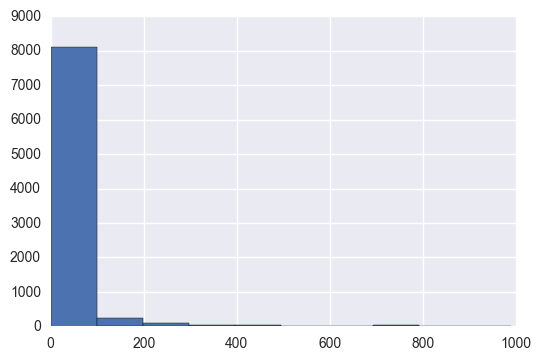

In [8]:
train['prix'].hist()

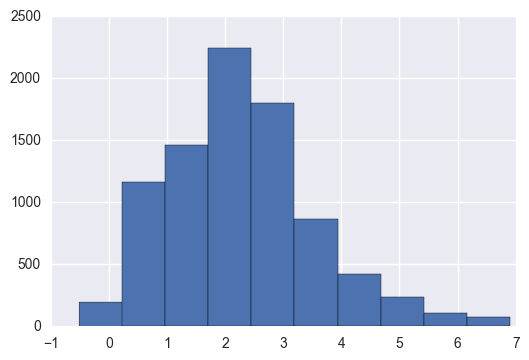

In [9]:
train['logprix'] = train['prix'].apply(np.log)
train['logprix'].hist()

##### 0.4.2. The impact of 'tx rembours'

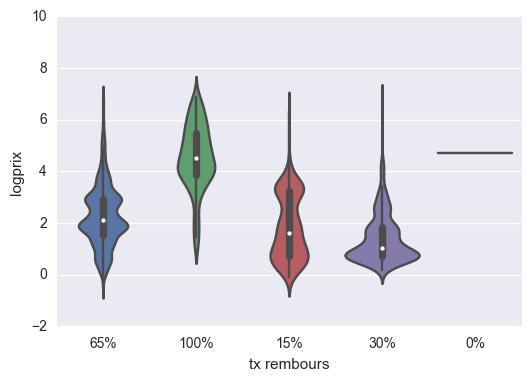

In [10]:
sns.violinplot(y="logprix", x="tx rembours", data=train)

##### 0.4.3. The influence of the statut on the price

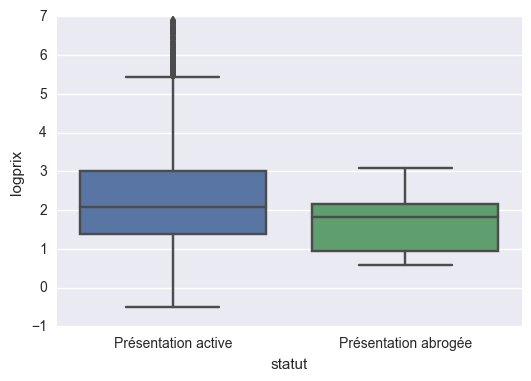

In [11]:
sns.boxplot(y="logprix", x="statut", data=train)

##### 0.4.4. The distribution and the difference between 'AMM date' and 'declar date'

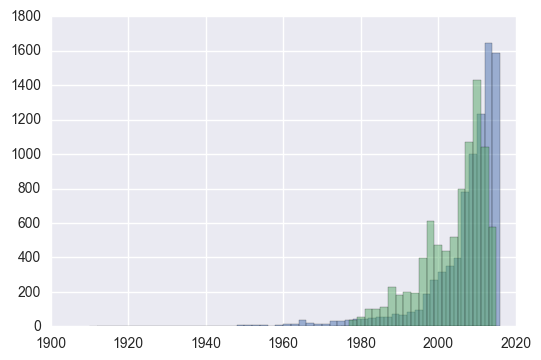

In [12]:
bins_declar = (max(train['date declar annee'])- min(train['date declar annee']))/2
bins_amm = (max(train['date amm annee'])- min(train['date amm annee']))/2


train['date declar annee'].hist(bins=bins_declar, alpha=0.5)
train['date amm annee'].hist(bins=bins_amm, alpha=0.5)

### 1. Data Cleaning <a name="Data_Cleaning"></a>

From this part, we work on the data. So, we choose to copy the two dataset to keep the original dataset unchanged.

In [13]:
train_set = train.copy()
test_set = test.copy()

#### 1.1. Drop duplicates rows <a name="Duplicated"></a>

Duplicates variables are not good to train a model because one individual is over represented. So, 
* We check if it exists duplicates rows in the training set
* We suppress duplicates if it is necessary


In [14]:
nb_duplicated = sum(train_set.duplicated())
print 'In the training set we found {} duplicated rows.' .format(nb_duplicated)

In the training set we found 376 duplicated rows.


In [15]:
nb_duplicated = sum(test_set.duplicated())
print 'In the test set we found {} duplicated rows.' .format(nb_duplicated)

In the test set we found 0 duplicated rows.


We choose to suppress these rows. 

In [16]:
train_set.drop_duplicates(keep='first',inplace=True)
print 'After supressing duplicated values, the training set contains {} rows ({} previously)'.format(train_set.shape[0],train.shape[0])

After supressing duplicated values, the training set contains 8188 rows (8564 previously)


#### 1.2. Drop duplicates rows bis (without interest variable)  <a name="Duplicated_bis"></a>

Note that in some cases there exists duplicated values for features but not for the interest variable. It seems important to verify this.  

In [17]:
nb_duplicated = sum(train_set[feat_all].duplicated())
print 'In the dataset we found {} duplicated rows.' .format(nb_duplicated)

In the dataset we found 691 duplicated rows.


How this values are the same and what is the difference in terms of prices?

In [18]:
train_set[train_set[feat_all].duplicated(keep=False)==True].sort_values(by='libelle').head(4)

,libelle,libelle_plaquette,libelle_ampoule,libelle_flacon,libelle_tube,libelle_stylo,libelle_seringue,libelle_pilulier,libelle_sachet,libelle_comprime,...,forme pharma,voies admin,statut admin,date declar annee,date amm annee,type proc,titulaires,substances,prix,logprix
3944,1 cartouche(s) bicompartimentée(s) en verre da...,0,0,0,0,1,0,0,0,0,...,poudre et solvant pour solution injectable,sous-cutanée,Autorisation active,2002,2002,Procédure centralisée,MERCK SHARP & DOHME (GRANDE BRETAGNE),PEGINTERFÉRON ALFA-2B,93.44,4.537320
3692,1 cartouche(s) bicompartimentée(s) en verre da...,0,0,0,0,1,0,0,0,0,...,poudre et solvant pour solution injectable,sous-cutanée,Autorisation active,2002,2002,Procédure centralisée,MERCK SHARP & DOHME (GRANDE BRETAGNE),PEGINTERFÉRON ALFA-2B,271.34,5.603373
4347,1 cartouche(s) bicompartimentée(s) en verre da...,0,0,0,0,1,0,0,0,0,...,poudre et solvant pour solution injectable,sous-cutanée,Autorisation active,2002,2002,Procédure centralisée,MERCK SHARP & DOHME (GRANDE BRETAGNE),PEGINTERFÉRON ALFA-2B,183.33,5.211288
5632,1 cartouche(s) bicompartimentée(s) en verre da...,0,0,0,0,1,0,0,0,0,...,poudre et solvant pour solution injectable,sous-cutanée,Autorisation active,2002,2002,Procédure centralisée,MERCK SHARP & DOHME (GRANDE BRETAGNE),PEGINTERFÉRON ALFA-2B,147.42,4.993286


If we look the prices, we can remark we have a lot of difference between them. We have no information about the update of the data. So, we think one solution is to aggregate the data to choose the mean. 

In [19]:
nb_rows_before = train_set.shape[0]

train_set_1 = train_set[train_set[feat_all].duplicated(keep=False)==False]

duplicated_features = train_set[train_set[feat_all].duplicated(keep=False)==True]
agg_duplicated = duplicated_features.groupby(by=feat_all).mean()
agg_duplicated = agg_duplicated.reset_index()

train_set = train_set_1.append(agg_duplicated)
train_set.reset_index(drop=True,inplace=True)

if (nb_rows_before-nb_duplicated)==train_set.shape[0]:
    print 'Transformation is ok.'
print 'In the dataset now we have {} duplicated rows.' .format(train_set.shape[0])

Transformation is ok.
In the dataset now we have 7497 duplicated rows.


#### 1.3. Cleaning the NaN values <a name="NaN"></a>

A lot of models do not accept NaN values. So this is necessary:
* To look what are the variables that contains NaN. 
* To look the number of NaN in each variable
* If some rows in the training set contains a lot of NaN
* What type of technics we use to replace NaN?

In [20]:
check_na = train_set.apply(lambda x: sum(x.isnull()),axis=0)
check_na[check_na > 0]

Series([], dtype: int64)

In [21]:
check_na = test_set.apply(lambda x: sum(x.isnull()),axis=0)
check_na[check_na > 0]

Series([], dtype: int64)

**There is no NaN value in our training set and test set.**

### 2. Single Model <a name="Single_Model"></a>

#### 2.1 Cross-Validation  <a name="Cross_Validation"></a>

We must define a cross-validation to validate our model but also for feature engineering. The idea in cross-validation is to split the data in different part. But you have to take some minutes to define your cross-validation. Because the cross-validation validate all your reasoning. The different issues are: 
* Choosing the number of **partition K**. In a datascience competition, it is common to take a test in your cross-validation with the same size than the real test set. But thinking biais and variance problem. 


* **Imbalance Distribution**: If you have an imbalance distribution data, it could be useful to define a stratified partition. 


* **Grouped Data**: If you have some rows from a same individual. 


* **Times Series Data**: In a case of particular Time Series Data you must take into account that.

Here the interest variable is 'price'. We have unbalanced data but we cannot tackle this problem with cross-val. The dataset contains after cleaning 7,497 rows and the test 3 671, so you have a ratio of two between test and training. It is very huge and it will be difficult to find a very good accuracy with this length.

We choose a classical cross-val with 5 folds for our model. 

##### 2.1.1 Classical Cross-Validation

In [22]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5)

#### 2.2 Single Model <a name="Single_Model2"></a>

The goal is to define a single model that help to verify our choices in terms of feature engineering and modeling. So, we can use random forest for classification or regression relative to the problem that we want to solve.

In [24]:
# Classification problem
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10, random_state=12)

# Regression problem
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(n_estimators=10, random_state=12)

#### 2.3 Performance Metrics <a name="Perf"></a>

This competition is based on the MAP error.

In [25]:
# Mean Absolute Percentage Error
def mape_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

#### 2.4 Single Model Function <a name="Single_function"></a>

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import KFold

def SingleModelTest(train_X, train_Y):
    err = 0
    K_Fold = 5

    for train_index, test_index in KFold(train_X.shape[0], n_folds=K_Fold):
        X_train, X_test = train_X.ix[train_index, :], train_X.ix[test_index, :]
        y_train, y_test = train_Y[train_index], train_Y[test_index]  
        RandomForestClassifier(n_estimators=10, random_state=12)
        reg.fit(X_train, y_train)
        pred = reg.predict(X_test)
        err += mape_error(np.exp(y_test), np.exp(pred))
        print mape_error(np.exp(y_test), np.exp(pred))
    print "*** MAPE Error : ",(round(err / K_Fold,2))

### 3. Features Engineering <a name="Features_Engineering"></a>

#### 3.1. Transformation of 'prix' <a name="Prix_transformation"></a>

We take a classical model with just num variable and look if the log transformation is better or not. This could change our Single Model Function.

In [28]:
train_X = train_set[feat_num]
train_Y = train_set['prix']

err = 0
K_Fold = 5

for train_index, test_index in KFold(train_X.shape[0], n_folds=K_Fold):
    X_train, X_test = train_X.ix[train_index, :], train_X.ix[test_index, :]
    y_train, y_test = train_Y[train_index], train_Y[test_index]  
    reg = RandomForestRegressor(n_estimators=10, random_state=12)
    reg.fit(X_train, y_train)
    pred = reg.predict(X_test)
    err += mape_error(y_test, pred)
    print mape_error(y_test, pred)
print "*** MAPE Error : ",(round(err / K_Fold,2))

233.697729292
192.903535297
201.91046503
221.342878819
196.092098265
*** MAPE Error :  209.19


In [29]:
train_set['log_prix'] = train_set['prix'].apply(np.log)
train_X = train_set[feat_num]
train_Y = train_set['log_prix']

err = 0
K_Fold = 5

for train_index, test_index in KFold(train_X.shape[0], n_folds=K_Fold):
    X_train, X_test = train_X.ix[train_index, :], train_X.ix[test_index, :]
    y_train, y_test = train_Y[train_index], train_Y[test_index]  
    reg = RandomForestRegressor(n_estimators=10, random_state=12)
    reg.fit(X_train, y_train)
    pred = reg.predict(X_test)
    err += mape_error(np.exp(y_test), np.exp(pred))
    print mape_error(np.exp(y_test), np.exp(pred))
print "*** MAPE Error : ",(round(err / K_Fold,2))

106.104180607
96.6311984948
87.9297034146
90.0953702836
82.0942301854
*** MAPE Error :  92.57


** So the log-transformation is clearly better, we implement that in the single model function **

#### 3.2. Date variables <a name="Date"></a>

In [30]:
train_X = train_set[feat_num]
train_Y = train_set['log_prix']
SingleModelTest(train_X, train_Y)

106.104180607
96.6311984948
87.9297034146
90.0953702836
82.0942301854
*** MAPE Error :  92.57


In [31]:
train_X = train_set[feat_num+feat_dates]
train_Y = train_set['log_prix']
SingleModelTest(train_X, train_Y)

90.1974442469
94.4514425631
105.887333569
83.3454620189
96.304606034
*** MAPE Error :  94.04


If we transform the date features.

In [32]:
feat_dates

['date declar annee', 'date amm annee']

In [36]:
train_set['date declar annee_b'] = max(train_set['date declar annee']) - train_set['date declar annee']
train_set['date amm annee_b'] = max(train_set['date amm annee']) - train_set['date amm annee'] 
feat_dates_b = ['date declar annee_b','date amm annee_b']
train_X = train_set[feat_num+feat_dates_b]
train_Y = train_set['log_prix']
SingleModelTest(train_X, train_Y)

89.9687246833
93.3498602784
106.975008115
84.2973240362
96.4150342082
*** MAPE Error :  94.2


Adding Date seems not to be a good things to have a better result. 

In [37]:
train_set['data_diff_declar_amm']=train_set['date amm annee_b']-train_set['date declar annee_b']
train_X = train_set[feat_num+['data_diff_declar_amm']]
train_Y = train_set['log_prix']
SingleModelTest(train_X, train_Y)

114.6802307
85.7850185881
97.0735805146
93.8136919259
93.9328309838
*** MAPE Error :  97.06


** So adding date variable do not bring more relevant information.**

#### 3.3. Categorical Features <a name="CatFeat"></a>

##### 3.3.1. The combinaison of the features

We test to find the best combination of the categorical features.

In [38]:
feat_cat 

['statut',
 'etat commerc',
 'agrement col',
 'tx rembours',
 'voies admin',
 'statut admin',
 'type proc']

In [62]:
train_X = train_set[feat_num+feat_cat]
train_X = pd.get_dummies(train_X,drop_first=True)
train_Y = train_set['log_prix']
SingleModelTest(train_X, train_Y)

68.932642482
67.7011931453
69.1111382552
60.2714616304
66.1363363439
*** MAPE Error :  66.43


In [61]:
train_X = train_set[feat_num+['type proc','voies admin','tx rembours','statut admin']]
train_X = pd.get_dummies(train_X,drop_first=True)
train_Y = train_set['log_prix']
SingleModelTest(train_X, train_Y)

66.6120756132
67.1865847579
67.0868711335
59.7789847386
64.4290445183
*** MAPE Error :  65.02


In [66]:
feat_cat_b = ['type proc','voies admin','tx rembours','statut admin']

** After some tests in terms of prediction, feat_cat_b is the vector that contains the best combination of the categorical features**

##### 3.3.2. The particular case of 'tx rembours'

Is it better to consider 'tx rembours' as a categorical variable or as a numeric variable ?

In [42]:
train_set['tx rembours_num'] = [int(x.replace("%", "")) for x in train_set["tx rembours"]]

In [46]:
train_X = train_set[feat_num+feat_cat_b]
train_X = pd.get_dummies(train_X,drop_first=True)
train_Y = train_set['log_prix']
SingleModelTest(train_X, train_Y)

61.286844148
58.4343880804
58.8482537745
57.5694959048
57.6138647856
*** MAPE Error :  58.75


In [44]:
train_X = train_set[feat_num+['type proc','voies admin','tx rembours_num','statut admin','forme pharma']]
train_X = pd.get_dummies(train_X,drop_first=True)
train_Y = train_set['log_prix']
SingleModelTest(train_X, train_Y)

60.5169391915
59.2215515452
59.7778051454
57.8840465037
57.3982320106
*** MAPE Error :  58.96


**This is unclear that increase the performance. So we keep 'tx rembours' as a categorical variable. **

#### 3.4. Text variables  <a name="Text"></a>

In [79]:
feat_text

['libelle', 'titulaires', 'substances']

##### 3.4.1. substances

To use substances as a feature, we transform this variable.

In [45]:
distinctCategs = (train_set['substances']
                  .apply(lambda col_value : col_value.split(', '))
                  .apply(pd.Series)
                  .unstack()
                  .dropna()
                  .unique())

feat_substances = [value for value in distinctCategs]
print len(feat_substances)
for distinctCateg in distinctCategs:
    train_set[distinctCateg] = train_set['substances'].apply(lambda x : 1 if distinctCateg in x else 0)

1675


In [67]:
train_X = train_set[feat_num+feat_cat_b+feat_substances]
train_X = pd.get_dummies(train_X,drop_first=True)
train_Y = train_set['log_prix']
SingleModelTest(train_X, train_Y)

31.6721450763
35.5842147923
33.2980363164
33.8590340957
34.1893886963
*** MAPE Error :  33.72


Other way to treat the feature 'substances', as we can see substances have some words between parentheses, we choose to remove this. 

In [48]:
substance_n = [value.encode('utf8') for value in train_set['substances']]
substance_n = pd.Series(substance_n)
list_sc = [',','(',')','))','((']
for carac in list_sc:
    substance_n = substance_n.map(lambda value: str.replace(value, carac, ""))
substance_n = [value.decode('utf8') for value in substance_n]
train_set['substances_n'] = substance_n

In [68]:
distinctCategs = (train_set['substances_n']
                  .apply(lambda col_value : col_value.split(' '))
                  .apply(pd.Series)
                  .unstack()
                  .dropna()
                  .unique())

feat_substances_n = [value for value in distinctCategs]

for distinctCateg in distinctCategs:
    train_set[distinctCateg] = train_set['substances_n'].apply(lambda x : 1 if distinctCateg in x else 0)

In [69]:
train_X = train_set[feat_num+feat_cat_b+feat_substances_n]
train_X = pd.get_dummies(train_X,drop_first=True)
train_Y = train_set['log_prix']
SingleModelTest(train_X, train_Y)

31.7824245891
35.3521218735
32.3884276792
34.2250022868
35.376652803
*** MAPE Error :  33.82


** We can remark when you incorporate substances as a feature this increase a lot the performance of the model ! We keep the first transformation because the MAP performance is better.**

##### 3.4.2. forme pharma

We can encode forme pharma with different forms: 
* As a categorical variable directly
* Using transformation to separate the text (this method add all of information)

In [51]:
len(train_set['forme pharma'].unique())

190

In [72]:
train_X = train_set[feat_num+feat_cat_b+feat_substances+['forme pharma']]
train_X = pd.get_dummies(train_X,drop_first=True)
train_Y = train_set['log_prix']
SingleModelTest(train_X, train_Y)

31.5749034448
34.8310684086
34.1575340872
33.6017086211
33.037336659
*** MAPE Error :  33.44


In [73]:
distinctCategs = (train_set['forme pharma']
                  .apply(lambda col_value : col_value.split(','))
                  .apply(pd.Series)
                  .unstack()
                  .dropna()
                  .unique())

feat_forme_pharma = [value for value in distinctCategs]

for distinctCateg in distinctCategs:
    train_set[distinctCateg] = train_set['forme pharma'].apply(lambda x : 1 if distinctCateg in x else 0)
    
train_X = train_set[feat_num+feat_cat_b+feat_substances+feat_forme_pharma]
train_X = pd.get_dummies(train_X,drop_first=True)
train_Y = train_set['log_prix']
SingleModelTest(train_X, train_Y)

30.877171184
33.8349743768
34.7604285401
34.4769202092
33.2787404544
*** MAPE Error :  33.45


**The model is improved relative to previously. The difference between the two way to proceed is unclear, we choose to transform forme pharma as a categorical variable.**

##### 3.4.3. titulaires

In [74]:
len(train_set['titulaires'].unique())

325

In [75]:
distinctCategs = (train_set['titulaires']
                  .apply(lambda col_value : col_value.split(' '))
                  .apply(pd.Series)
                  .unstack()
                  .dropna()
                  .unique())

feat_titulaires = [value for value in distinctCategs]

for distinctCateg in feat_titulaires:
    train_set[distinctCateg] = train_set['titulaires'].apply(lambda x : 1 if distinctCateg in x else 0)

In [76]:
train_X = train_set[feat_num+feat_cat_b+feat_substances+['forme pharma']+feat_titulaires]
train_X = pd.get_dummies(train_X,drop_first=True)
train_Y = train_set['log_prix']
SingleModelTest(train_X, train_Y)

36.1340015139
36.018909698
36.1862746263
35.1858842987
35.7055500087
*** MAPE Error :  35.85


**This feature does not improve the model.**

##### 3.4.4. libelle

In [77]:
len(train_set['libelle'].unique())

2575

In [78]:
distinctCategs = (train_set['libelle']
                  .apply(lambda col_value : col_value.split(' '))
                  .apply(pd.Series)
                  .unstack()
                  .dropna()
                  .unique())

feat_libelle = [value for value in distinctCategs]

for distinctCateg in distinctCategs:
    train_set[distinctCateg] = train_set['libelle'].apply(lambda x : 1 if distinctCateg in x else 0)

In [80]:
train_X = train_set[feat_num+feat_cat_b+feat_substances+['forme pharma']+feat_libelle]
train_X = pd.get_dummies(train_X)
train_Y = train_set['log_prix']
SingleModelTest(train_X, train_Y)

35.196984893
38.0346123197
37.2942303971
37.5560242556
33.6943586726
*** MAPE Error :  36.36


Are there substances information in the variable libelle ?

In [81]:
[value for value in feat_libelle if value in feat_substances_n]

[u'3',
 u'1',
 u'2',
 u'5',
 u'6',
 u'16',
 u'-',
 u'',
 u':',
 u'18',
 u'LA',
 u'A',
 u'B',
 u'11']

Clearly these variable are non-relevant.

#### 3.5 Other Features Engineering

Multiplying number of ml by the number of the recipents. 

In [87]:
nb = ['nb_plaquette',
 'nb_ampoule',
 'nb_flacon',
 'nb_tube',
 'nb_stylo',
 'nb_seringue',
 'nb_pilulier',
 'nb_sachet',
 'nb_comprime',
 'nb_gelule',
 'nb_film',
 'nb_poche',
 'nb_capsule']

multi = train_set[nb].sum(axis=1)
train_set['ml_all_product'] = multi*train_set['nb_ml']

In [89]:
train_X = train_set[feat_num+feat_cat_b+feat_substances+['forme pharma']+['ml_all_product']]
train_X = pd.get_dummies(train_X)
train_Y = train_set['log_prix']
SingleModelTest(train_X, train_Y)

31.6339363692
35.4195339387
33.6857304527
33.1943690465
33.4298816467
*** MAPE Error :  33.47


Remember the best performance was 33.45. So, this is not improve the model. 

#### 3.5. The Parse Method <a name="Parse"></a>

Now we implement the transformation that we test before. To have the best set of features to optimize. We choose to re-implement all of the relevant code that we use before to execute just one function. 

In [90]:
## Libraries
import datetime, sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
%matplotlib inline 


## Importation of data
train = pd.read_csv('Data/boites_medicaments_train.csv',encoding='utf8',sep=';')
test = pd.read_csv('Data/boites_medicaments_test.csv',encoding='utf8', sep=';')


#List of features

#Interest variable
y_var = ['prix']

# features numériques
feat_num = ['libelle_plaquette', 'libelle_ampoule', 'libelle_flacon', 
            'libelle_tube', 'libelle_stylo', 'libelle_seringue',
            'libelle_pilulier', 'libelle_sachet', 'libelle_comprime', 
            'libelle_gelule', 'libelle_film', 'libelle_poche',
            'libelle_capsule'] + ['nb_plaquette', 'nb_ampoule', 
            'nb_flacon', 'nb_tube', 'nb_stylo', 'nb_seringue',
            'nb_pilulier', 'nb_sachet', 'nb_comprime', 'nb_gelule', 
            'nb_film', 'nb_poche', 'nb_capsule', 'nb_ml']

# features date
feat_dates = ['date declar annee', 'date amm annee']

# features catégorielles
feat_cat = ['statut', 'etat commerc', 'agrement col', 'tx rembours',
          'voies admin', 'statut admin', 'type proc','forme pharma']

# features texte
feat_text = ['libelle', 'titulaires', 'substances']


# All features vector
feat_all = feat_num + feat_dates + feat_cat + feat_text

# Mean Absolute Percentage Error
def mape_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

### Duplicates
train.drop_duplicates(keep='first',inplace=True)

train_1 = train[train[feat_all].duplicated(keep=False)==False]

duplicated_features = train[train[feat_all].duplicated(keep=False)==True]
agg_duplicated = duplicated_features.groupby(by=feat_all).mean()
agg_duplicated = agg_duplicated.reset_index()

train = train_1.append(agg_duplicated)
train.reset_index(drop=True,inplace=True)

train['SOURCE'] = 'TRAIN'
test['SOURCE'] = 'TEST'
BIG = pd.concat([train, test], axis=0)
BIG.reset_index(drop=True,inplace=True)
#BIG = train.copy()
print "TRAIN", train.shape
print "TEST ", test.shape
print "BIG ", BIG.shape

featToDel = ['titulaires','id','libelle','statut', 'etat commerc','agrement col',
             'date declar annee', 'date amm annee']

featToDummy = ['tx rembours','voies admin', 'statut admin', 'type proc','forme pharma']

featToTransform = ['prix','substances']

featToEncode = []

config = {"featToDel":featToDel,
          "featToDummy":featToDummy,
          "featToEncode":featToEncode,
          "featToTransform":featToTransform}
print '_______________________________________________________________________________________________'
print '__________________________________________ Features __________________________________________'
print "DELETE    :  ", featToDel
print "DUMMY     :  ", featToDummy
print "ENCODE    :  ", featToEncode
print "TRANSFORM :  ", featToTransform
print '_______________________________________________________________________________________________'

def parse(X, config, silent=False) :
    start = datetime.datetime.today().now()
    if not silent:
        print '__________________________________________ PARSE __________________________________________'
        print '--> ', start.strftime('%d-%m-%Y : %H:%M')
        print 'BEFORE : ', X.shape
        
    print "---Feature to delete "
    #Feature to delete
    featToDel = config["featToDel"]
    X.drop(featToDel, axis =1, inplace=True)
     
    print "---Feature to Transform "    
    if "substances" in config["featToTransform"]:
        distinctCategs = (X[X['SOURCE'] == 'TRAIN']['substances']
                  .apply(lambda col_value : col_value.split(','))
                  .apply(pd.Series)
                  .unstack()
                  .dropna()
                  .unique())
        
        for distinctCateg in distinctCategs:
            X[distinctCateg] = X['substances'].apply(lambda x : 1 if distinctCateg in x else 0)
        
        X.drop("substances", axis =1, inplace=True)
    
    
    """if "libelle" in config["featToTransform"]:
        distinctCategs_b = (X[X['SOURCE'] == 'TRAIN']['libelle']
                  .apply(lambda col_value : col_value.split(' '))
                  .apply(pd.Series)
                  .unstack()
                  .dropna()
                  .unique())
        
        feat_libelle = [value for value in distinctCategs_b]

        for distinctCateg in feat_libelle:
            X[distinctCateg] = X['libelle'].apply(lambda x : 1 if distinctCateg in x else 0)  
        
        X.drop("libelle", axis =1, inplace=True)
        
    if "titulaires" in config["featToTransform"]:
        distinctCategs = (X['titulaires']
                  .apply(lambda col_value : col_value.split(' '))
                  .apply(pd.Series)
                  .unstack()
                  .dropna()
                  .unique())

        for distinctCateg in distinctCategs:
            X[distinctCateg] = X['titulaires'].apply(lambda x : 1 if distinctCateg in x else 0)
        
        X.drop("titulaires", axis =1, inplace=True)       

    if "forme pharma" in config["featToTransform"]:
        distinctCategs = (X['forme pharma']
                  .apply(lambda col_value : col_value.split(' '))
                  .apply(pd.Series)
                  .unstack()
                  .dropna()
                  .unique())

        for distinctCateg in distinctCategs:
            X[distinctCateg] = X['forme pharma'].apply(lambda x : 1 if distinctCateg in x else 0)
        
        X.drop("forme pharma", axis =1, inplace=True)"""
        
    if "prix" in config["featToTransform"]:
        X["log_prix"] = X["prix"].apply(np.log)
    del X["prix"]
    
    
    
    print "---Feature to dummy "
    #Feature to dummy
    featToDummy = config["featToDummy"]
    if featToDummy:
        dums = pd.get_dummies(X[featToDummy],drop_first=True)
        X = pd.concat([X, dums], axis=1)
        X.drop(featToDummy, axis =1, inplace=True)
        
    y_train = X[X['SOURCE'] == 'TRAIN']["log_prix"]
    del X['log_prix']
    
    #Suppress columns non-using
    X_tr = X[X['SOURCE'] == 'TRAIN']
    del X_tr['SOURCE']
    select1 = VarianceThreshold()
    select1.fit_transform(X_tr) 
    n_col_tr_f = np.where(select1.get_support()==False)
    n_col_tr_f = X_tr.columns.values[n_col_tr_f]

    """
    X_te = X[X['SOURCE'] == 'TEST']
    del X_te['SOURCE']
    select2 = VarianceThreshold()
    select2.fit_transform(X_te) 
    n_col_te_f = np.where(select2.get_support()==False)
    n_col_te_f = X_te.columns.values[n_col_te_f]
    
    n_col_f = np.append(n_col_tr_f,n_col_te_f)
    n_col_f = set(n_col_f)"""
    
    for features in n_col_tr_f:
        del X[features]
    

    X_train = X[X['SOURCE'] == 'TRAIN']
    X_test = X[X['SOURCE'] == 'TEST']    
    del X_test['SOURCE']
    del X_train['SOURCE']
    
    if not silent:
        print '%s Elapsed time :%d s' % (datetime.datetime.today().now().strftime('--> %d-%m-%Y : %H:%M'), 
        (datetime.datetime.today().now().now() - start).total_seconds())
        print 'AFTER TRAIN :', X_train.shape
        print 'AFTER TEST :', X_test.shape
        sys.stdout.flush()
    
    return X_train, X_test, y_train
X_train, X_test, y_train = parse(BIG.copy(), config)

TRAIN (7497, 42)
TEST  (3671, 42)
BIG  (11168, 43)
_______________________________________________________________________________________________
__________________________________________ Features __________________________________________
DELETE    :   ['titulaires', 'id', 'libelle', 'statut', 'etat commerc', 'agrement col', 'date declar annee', 'date amm annee']
DUMMY     :   ['tx rembours', 'voies admin', 'statut admin', 'type proc', 'forme pharma']
ENCODE    :   []
TRANSFORM :   ['prix', 'substances']
_______________________________________________________________________________________________
__________________________________________ PARSE __________________________________________
-->  08-11-2016 : 11:09
BEFORE :  (11168, 43)
---Feature to delete 
---Feature to Transform 
---Feature to dummy 
--> 08-11-2016 : 11:09 Elapsed time :13 s
AFTER TRAIN : (7497, 2490)
AFTER TEST : (3671, 2490)


### 4. Diverse Models Optimisation <a name="Model"></a>

Now we decide to optimize some ML models with with our data after the Parse Method.

#### 4.1 Gradient Boosting <a name="GBR"></a>

In [ ]:
from sklearn.cross_validation import KFold
from sklearn.ensemble import GradientBoostingRegressor

NBROUND = 5
n_estimator = [250]
max_depth = [10,50,100,500]
min_sample_split = [1,2,5,10]
learning_rate = [.5,.1,.01]


for n in n_estimator:
    for max_d in max_depth:
        for min_sam in min_sample_split:
            for learn_rate in learning_rate:
                err = 0
                params = {'n_estimators': n, 'max_depth': max_d, 'min_samples_split': min_sam,
                          'learning_rate': learn_rate,'random_state': 1024, 'subsample': 0.5,'loss':'huber'}

                for train_index, test_index in KFold(X_train.shape[0], n_folds=NBROUND):
                    X_train_cv, X_test_cv = X_train.ix[train_index, :], X_train.ix[test_index, :]
                    y_train_cv, y_test_cv = y_train[train_index], y_train[test_index]  
                    reg = GradientBoostingRegressor(**params)
                    reg = reg.fit(X_train_cv, y_train_cv)
                    pred_cv = reg.predict(X_test_cv)
                    err += mape_error(np.exp(y_test_cv), np.exp(pred_cv))
                    print mape_error(np.exp(y_test_cv), np.exp(pred_cv))
                print (round(err / NBROUND,2), n, max_d,min_sam,learn_rate)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

n_estimator = 10
max_depth = None
min_sample_split = 1
learning_rate = .1

params = {'n_estimators': n_estimator, 'max_depth': max_depth, 'min_samples_split': min_sample_split,
                          'learning_rate': learning_rate,'random_state': 1024}

clf = GradientBoostingRegressor(**params)
clf = clf.fit(X_train, y_train)

pred = np.exp(clf.predict(X_test))

pd.DataFrame({'id':range(1,len(pred)+1),'prix':pred}).to_csv('soumission_GBR_1_2.csv',
                          sep = ';', index=False, header=True)

#### 4.2. Random Forest <a name="RF"></a>

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import KFold

err = 0
K_Fold = 5


#X_trainb = pd.get_dummies(X_trainb)
for train_index, test_index in KFold(X_train.shape[0], n_folds=K_Fold):
    X_train_cv, X_test_cv = X_train.ix[train_index, :], X_train.ix[test_index, :]
    y_train_cv, y_test_cv = y_train[train_index], y_train[test_index]  
    reg = RandomForestRegressor(n_estimators=100, random_state=12,verbose=1)
    reg = reg.fit(X_train_cv, y_train_cv)
    pred_cv = reg.predict(X_test_cv)
    err += mape_error(np.exp(y_test_cv), np.exp(pred_cv))
    print mape_error(np.exp(y_test_cv), np.exp(pred_cv))
print "*** MAPE Error : ",(round(err / K_Fold,2))

In [146]:
from sklearn.ensemble import RandomForestRegressor

n_estimator = 2000
min_sample_split = 1


params = {'n_estimators': n_estimator, 'min_samples_split': min_sample_split,'random_state': 1024}

reg = RandomForestRegressor(**params)
reg = reg.fit(X_train, y_train)

pred = np.exp(reg.predict(X_test))

pd.DataFrame({'id':range(1,len(pred)+1),'prix':pred}).to_csv('Results/soumission_RF_1_8b_nn.csv',
                          sep = ';', index=False, header=True)

#### 4.3. Extra Trees <a name="ET"></a>

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.cross_validation import KFold

err = 0
K_Fold = 5

for train_index, test_index in KFold(X_train.shape[0], n_folds=K_Fold):
    X_train_cv, X_test_cv = X_train.ix[train_index, :], X_train.ix[test_index, :]
    y_train_cv, y_test_cv = y_train[train_index], y_train[test_index]  
    reg = ExtraTreesRegressor(n_estimators=10, random_state=12,criterion='mse',warm_start=True,verbose=1)
    reg.fit(X_train_cv, y_train_cv)
    pred_cv = reg.predict(X_test_cv)
    err += mape_error(np.exp(y_test_cv), np.exp(pred_cv))
    print mape_error(np.exp(y_test_cv), np.exp(pred_cv))
print "*** MAPE Error : ",(round(err / K_Fold,2))

In [147]:
from sklearn.ensemble import ExtraTreesRegressor

reg = ExtraTreesRegressor(n_estimators=2000, random_state=12,criterion='mse',warm_start=True,verbose=1)
reg = reg.fit(X_train, y_train)

pred = np.exp(reg.predict(X_test))

pd.DataFrame({'id':range(1,len(pred)+1),'prix':pred}).to_csv('Results/soumission_ET_3.csv',
                          sep = ';', index=False, header=True)

[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed: 35.1min finished
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:    4.4s finished


#### 4.4. Adaboost Regressor <a name="Ada"></a>

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.cross_validation import KFold

err = 0
K_Fold = 5

for train_index, test_index in KFold(X_train.shape[0], n_folds=K_Fold):
    X_train_cv, X_test_cv = X_train.ix[train_index, :], X_train.ix[test_index, :]
    y_train_cv, y_test_cv = y_train[train_index], y_train[test_index]  
    reg = AdaBoostRegressor()
    reg.fit(X_train_cv, y_train_cv)
    pred_cv = reg.predict(X_test_cv)
    err += mape_error(np.exp(y_test_cv), np.exp(pred_cv))
    print mape_error(np.exp(y_test_cv), np.exp(pred_cv))
print "*** MAPE Error : ",(round(err / K_Fold,2))

135.490443918
133.38920822


#### 4.4. Ridge Regression <a name="Ridges"></a>

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.cross_validation import KFold

NBROUND = 5
alpha = [0.8]

for alpha in alpha:
    err = 0
    for train_index, test_index in KFold(X_train.shape[0], n_folds=NBROUND):
        X_train_cv, X_test_cv = X_train.ix[train_index, :], X_train.ix[test_index, :]
        y_train_cv, y_test_cv = y_train[train_index], y_train[test_index]  
        reg = Ridge(alpha = alpha,normalize=False)
        reg.fit(X_train_cv, y_train_cv)
        pred_cv = reg.predict(X_test_cv)
        err += mape_error(np.exp(y_test_cv), np.exp(pred_cv))
        print mape_error(np.exp(y_test_cv), np.exp(pred_cv))
    print (round(err / NBROUND,2), alpha)

In [48]:
from sklearn.linear_model import Ridge

alpha = [.4]


reg = Ridge(alpha = alpha)
reg = reg.fit(X_train, y_train)

pred = np.exp(reg.predict(X_test))

pd.DataFrame({'id':range(1,len(pred)+1),'prix':pred}).to_csv('Results/soumission_Ridge_2_1.csv',
                          sep = ';', index=False, header=True)

#### 4.5. Elastic Net<a name="ENet"></a>

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.cross_validation import KFold

alpha = .01
err = 0
NBROUND = 5

for train_index, test_index in KFold(train.shape[0], n_folds=NBROUND):
    X_train_cv, X_test_cv = X_train.ix[train_index, :], X_train.ix[test_index, :]
    y_train_cv, y_test_cv = y_train[train_index], y_train[test_index]  
    reg = ElasticNet(alpha=alpha, l1_ratio=0.01,normalize=False, max_iter=5000)
    reg.fit(X_train_cv, y_train_cv)
    pred = reg.predict(X_test_cv)
    err += mape_error(np.exp(y_test_cv), np.exp(pred))
    print mape_error(np.exp(y_test_cv), np.exp(pred))
print (round(err / NBROUND,2))

#### 4.7. Lasso Regression <a name="Lasso"></a>

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.cross_validation import KFold

NBROUND = 5
alpha = [1e-5]

for alpha in alpha:
    err = 0
    for train_index, test_index in KFold(X_train.shape[0], n_folds=NBROUND):
        X_train_cv, X_test_cv = X_train.ix[train_index, :], X_train.ix[test_index, :]
        y_train_cv, y_test_cv = y_train[train_index], y_train[test_index]  
        reg = Lasso(alpha=alpha)
        reg.fit(X_train_cv, y_train_cv)
        pred_cv = reg.predict(X_test_cv)
        err += mape_error(np.exp(y_test_cv), np.exp(pred_cv))
        print mape_error(np.exp(y_test_cv), np.exp(pred_cv))
    print (round(err / NBROUND,2), alpha)

#### 4.6 Support Vectors Machine <a name="SVM"></a>

In [ ]:
from sklearn.svm import SVR
from sklearn.cross_validation import KFold

NBROUND = 5
err = 0

for train_index, test_index in KFold(X_train.shape[0], n_folds=NBROUND):
    X_train_cv, X_test_cv = X_train.ix[train_index, :], X_train.ix[test_index, :]
    y_train_cv, y_test_cv = y_train[train_index], y_train[test_index]  
    reg = SVR()
    reg.fit(X_train_cv, y_train_cv)
    pred_cv = reg.predict(X_test_cv)
    err += mape_error(np.exp(y_test_cv), np.exp(pred_cv))
    print mape_error(np.exp(y_test_cv), np.exp(pred_cv))
print (round(err / NBROUND,2))

### 5. Stacking and Blending <a name="Stacking"></a>

#### 5.1. Stacking by mean aggreagtion  <a name="Stacking_1"></a>

In [151]:
Model_1 = pd.read_csv('Results/soumission_ET_3.csv',
                      encoding='utf8',sep=';')
Model_4 = pd.read_csv('Results/soumission_RF_1_8b_nn.csv',
                      encoding='utf8',sep=';')
Model_3 = pd.read_csv('Results/soumission_Stack_10-29_47373.csv',
                      encoding='utf8',sep=';')

df = [Model_1['prix'],Model_4['prix'],Model_3['prix']]
df = pd.DataFrame(df).transpose()

pred_stack = df.mean(axis=1)

pd.DataFrame({'id':range(1,len(pred_stack)+1),'prix':pred_stack}).to_csv('Results/soumission_Stack_14.csv',
                          sep = ';', index=False, header=True)

#### 5.2. Basic Stacking with Linear Regression <a name="Stacking_2"></a>

In [453]:
from sklearn.cross_validation import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression

K_Fold = 5
n = 250

print 'RF Model....'
pred_cv_1 = []

for train_index, test_index in KFold(X_train.shape[0], n_folds=K_Fold):
    X_train_cv, X_test_cv = X_train.ix[train_index, :], X_train.ix[test_index, :]
    y_train_cv, y_test_cv = y_train[train_index], y_train[test_index]  
    reg = RandomForestRegressor(n_estimators=n, random_state=12)
    reg.fit(X_train_cv, y_train_cv)
    pred_cv_1 = np.append(pred_cv_1,reg.predict(X_test_cv))
    print '.....'

reg = RandomForestRegressor(n_estimators=n, random_state=12)
reg.fit(X_train, y_train)
pred_1 = reg.predict(X_test)
    
print 'ET Model....'
pred_cv_2 = []

alpha = [.4]

for train_index, test_index in KFold(X_train.shape[0], n_folds=K_Fold):
    X_train_cv, X_test_cv = X_train.ix[train_index, :], X_train.ix[test_index, :]
    y_train_cv, y_test_cv = y_train[train_index], y_train[test_index]  
    reg = ExtraTreesRegressor(n_estimators=n, random_state=12random_state=12,criterion='mse',warm_start=True,verbose=1)
    reg.fit(X_train_cv, y_train_cv)
    pred_cv_2 = np.append(pred_cv_2,reg.predict(X_test_cv))
    print '.....'

reg = ExtraTreesRegressor(n_estimators=n, random_state=12random_state=12,criterion='mse',warm_start=True,verbose=1)
reg = reg.fit(X_train, y_train)
pred_2 = reg.predict(X_test) 

regr = RandomForestRegressor(random_state=12)
pred_cv = pd.DataFrame([pred_cv_1,pred_cv_2]).transpose()
pred = pd.DataFrame([pred_1,pred_2]).transpose()
regr = regr.fit(pred_cv, y_train)
pred_f = np.exp(regr.predict(pred))

pd.DataFrame({'id':range(1,len(pred)+1),'prix':pred_f}).to_csv('Results/soumission_Stacking_Linear_5.csv',
                          sep = ';', index=False, header=True)   

RF Model....
.....
.....
.....
.....
.....
Ridge Model....
.....
.....
.....
.....
.....


#### 5.3. Stacking with stacked_generalizer <a name="Stacking_Gen"></a>

In [41]:
from stacked_generalization.lib.stacking import StackedRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
import numpy as np

VERBOSE = True
N_FOLDS = 5

X = np.asmatrix(X_train)
y = y_train
X_t = np.asmatrix(X_test)


# define base models
base_models = [RandomForestRegressor(n_estimators=50, random_state=12),
               ExtraTreesRegressor(n_estimators=50, random_state=12)]

# define blending model
blending_model = LinearRegression()

# initialize multi-stage model
sg = StackedRegressor(blending_model,base_models,n_folds=5,verbose=0,oob_score_flag=False)

# fit model
sg.fit(X,y)

pred_f = np.exp(sg.predict(X_t))

pd.DataFrame({'id':range(1,len(pred_f)+1),'prix':pred_f}).to_csv('Results/soumission_Stacking_Linear_3.csv',
                          sep = ';', index=False, header=True)   